In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap
import seaborn as sns

In [109]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

In [110]:
df_shape_z

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length,filename,label
0,-0.961415,-0.894772,1.258475,-0.843346,0.135962,0.447795,-0.597306,-1.185373,callo_1.png,smaller_than
1,-0.360419,0.546777,1.265948,-1.740919,-1.705151,-1.271934,0.510064,-0.369311,callo_10.png,smaller_than
2,-1.007075,-1.161657,0.280864,1.120647,1.269197,1.018866,-1.051417,-1.039241,callo_100.png,smaller_than
3,-0.791399,-0.944172,0.602786,1.184475,0.913221,-0.441900,-0.690335,-0.847833,callo_101.png,smaller_than
4,-1.449934,-1.612899,-0.817832,1.002834,1.210664,0.876506,-1.792010,-1.527979,callo_102.png,smaller_than
...,...,...,...,...,...,...,...,...,...,...
532,0.677867,1.059505,-0.758095,-0.543333,-0.607485,-0.690380,0.538420,1.134106,callo_95.png,higher_than
533,1.092142,0.926063,-1.279988,0.358045,0.055104,-1.057077,0.529269,1.361404,callo_96.png,higher_than
534,0.792944,0.682934,0.155389,-0.292736,-0.289068,-0.225443,0.734055,0.798670,callo_97.png,higher_than
535,0.594344,1.013475,-0.407132,-1.763399,-1.467330,1.445790,0.819826,1.257650,callo_98.png,higher_than


In [111]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_z_cl= df_shape_z.drop(columns=['filename', 'label'])

In [112]:
correlation_matrix = df_shape_z_cl.corr()

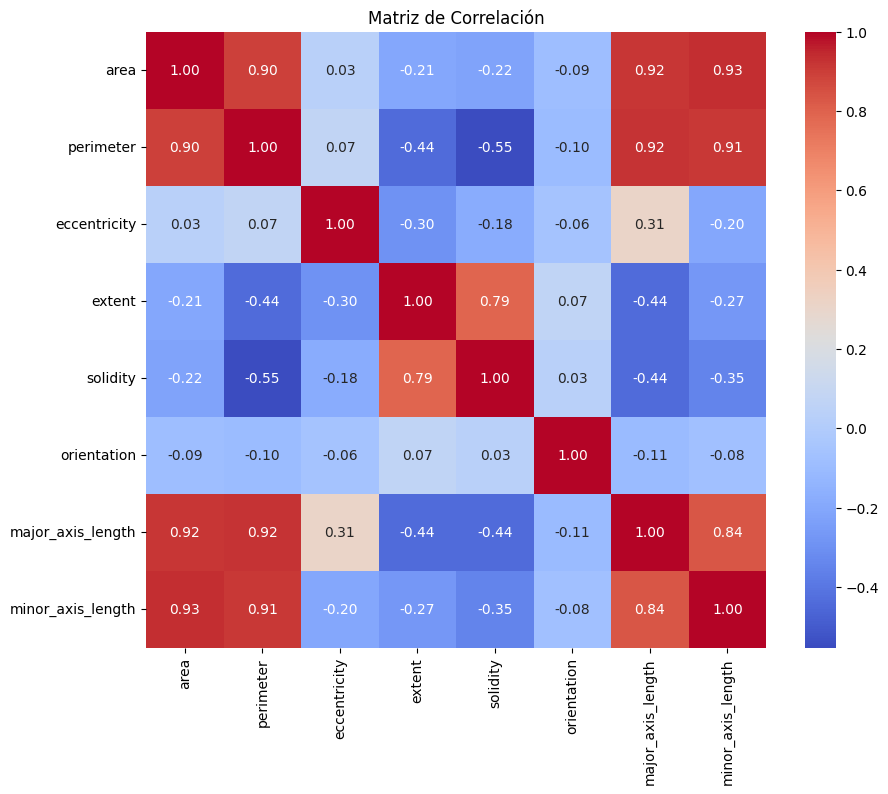

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

No consigo conseguir clusteres bien separados y repartidos ni con umap, después de ver la matriz de correlación veo que hay muchas variables correlacionadas, pruebo eliminar alguna como por ejemplo rgb_mean_r

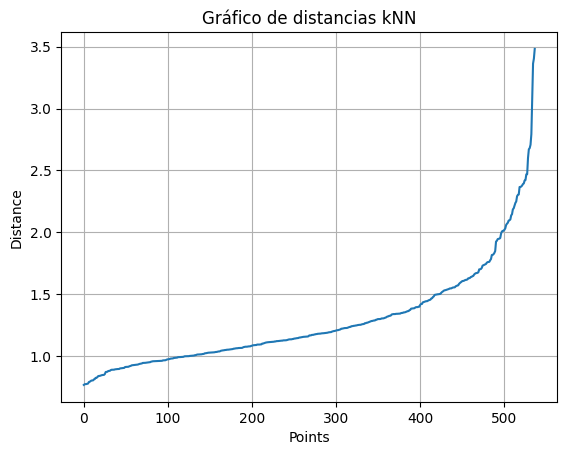

In [114]:
k = 9 #15
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_shape_z_cl)
distances, indices = neighbors_fit.kneighbors(df_shape_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [115]:
X_shape_z = np.array(df_shape_z_cl)

clustering = DBSCAN(eps=0.95, min_samples=5).fit(X_shape_z)

clustering.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  1,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1,  0, -1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  1,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0,
       -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,
       -1, -1, -1, -1,  0

In [116]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 191


In [117]:
y_true = df_shape_z['label'] 
y_pred = clustering.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_z)

Cluster DBSCAN  -1    0   1   2
Etiqueta Real                  
higher_than     98  165   0   5
smaller_than    93  171   5   0


UMAP:

In [355]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_z = umap.UMAP(n_neighbors= 16, n_components=2,min_dist=0.01, random_state=42)  
X_umap_z = umap_model_z.fit_transform(X_shape_z)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_26572\1744383643.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


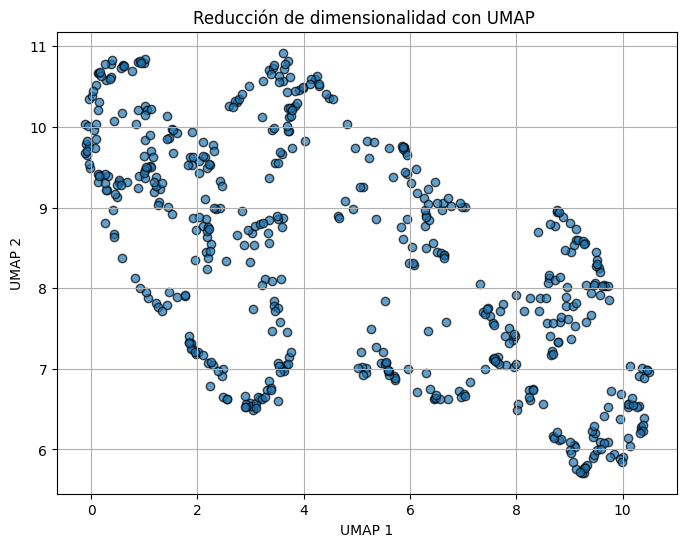

In [356]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [402]:
clustering_umap_z = DBSCAN(eps=1, min_samples=15, metric='manhattan').fit(X_umap_z)
clustering_umap_z.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [403]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [404]:
y_true = df_shape_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher_than      33  235
smaller_than    223   46


In [405]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_z[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.584


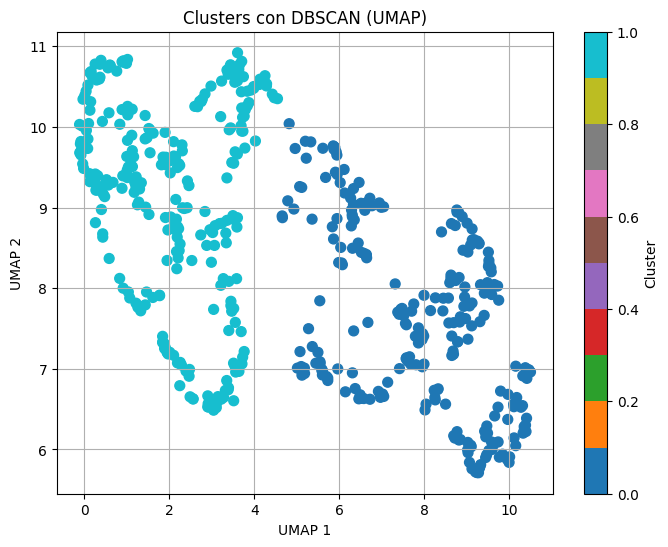

In [406]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

si uso epsilon 0.85 y min_samples=15 salen 3 clusteres, el tercer cluster seria el conjunto de puntos de en medio, pero baja la silueta a 0.407...

Con normalizacion min-max

In [407]:
df_shape_mm_cl= df_shape_mm.drop(columns=['filename', 'label'])

In [408]:
df_shape_mm_cl

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length
0,0.164032,0.204438,0.840083,0.448592,0.749355,0.638915,0.358292,0.192486
1,0.297348,0.477599,0.841452,0.301952,0.441238,0.138360,0.592452,0.362256
2,0.153903,0.153865,0.660993,0.769458,0.939005,0.805135,0.262267,0.222887
3,0.201746,0.195077,0.719967,0.779886,0.879431,0.379955,0.338620,0.262706
4,0.055665,0.068359,0.459722,0.750210,0.929210,0.763699,0.105664,0.121212
...,...,...,...,...,...,...,...,...
532,0.527668,0.574757,0.470665,0.497607,0.624936,0.307631,0.598448,0.675020
533,0.619565,0.549471,0.375058,0.644869,0.735823,0.200897,0.596513,0.722306
534,0.553195,0.503400,0.638007,0.538548,0.678224,0.442958,0.639816,0.605237
535,0.509140,0.566035,0.534958,0.298279,0.481038,0.929398,0.657953,0.700721


In [586]:
X_shape_mm = np.array(df_shape_mm_cl)

clustering_mm = DBSCAN(eps=1.5, min_samples=7).fit(X_shape_mm)

clustering_mm.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [587]:
labels = clustering_mm.labels_
n_clusters_mm = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_mm = list(labels).count(-1)

print(f"Número de clusters: {n_clusters_mm}")
print(f"Número de puntos de ruido: {n_noise_mm}")

Número de clusters: 1
Número de puntos de ruido: 0


In [588]:
y_true_mm = df_shape_mm['label'] 
y_pred_mm = clustering_mm.labels_     

contingency_table_mm = pd.crosstab(y_true_mm, y_pred_mm, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN    0
Etiqueta Real      
higher_than     268
smaller_than    269


UMAP:

In [657]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 7, n_components=2,min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_shape_mm)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_26572\975549371.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


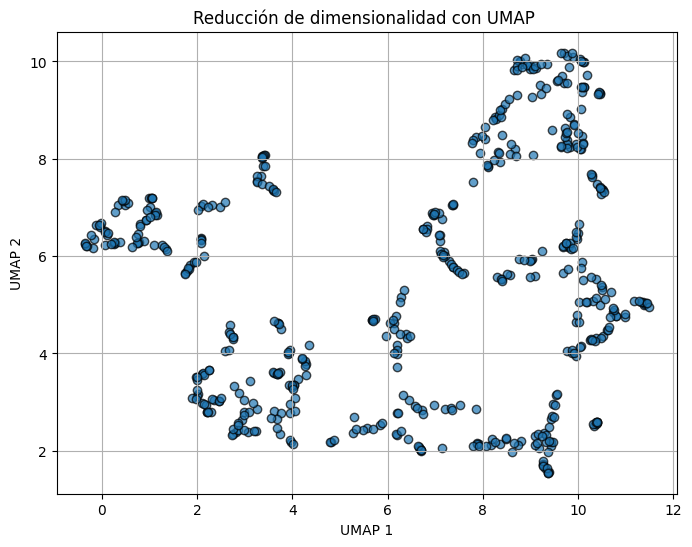

In [658]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [694]:
clustering_umap_mm = DBSCAN(eps=1.1, min_samples=7, metric='manhattan').fit(X_umap_mm)
clustering_umap_mm.labels_

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0,
       2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [695]:
labels = clustering_umap_mm.labels_
n_clusters_mm = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_mm = list(labels).count(-1)

print(f"Número de clusters: {n_clusters_mm}")
print(f"Número de puntos de ruido: {n_noise_mm}")

Número de clusters: 3
Número de puntos de ruido: 0


In [696]:
y_true_mm = df_shape_mm['label'] 
y_pred_mm = clustering_umap_mm.labels_     

contingency_table_mm = pd.crosstab(y_true_mm, y_pred_mm, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN    0    1   2
Etiqueta Real               
higher_than      71  186  11
smaller_than    142   44  83


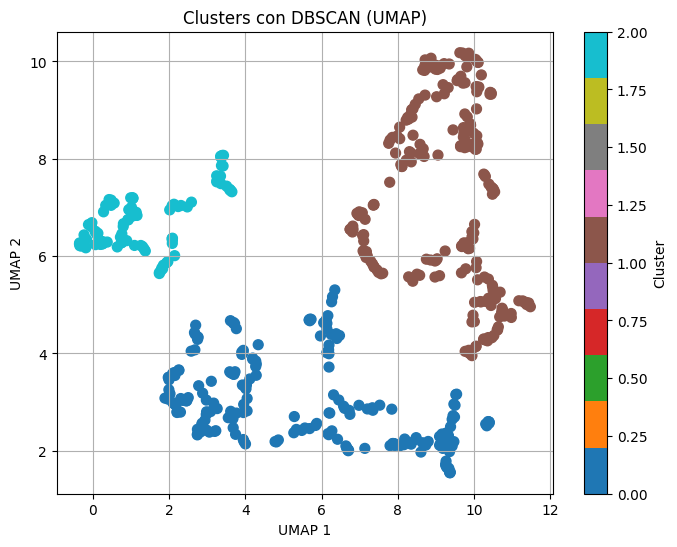

In [697]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [698]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette_mm = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette_mm:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.469
